**基本程式設定**

In [1]:
from scipy.integrate import odeint
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

**固定參數設定**

In [2]:
days = 273 

real_Total_Infected = [2, 2, 2, 2, 4, 4, 6, 19, 27, 34, 34, 69, 96, 117, 134, 172, 227, 311, 369, 450, 514, 579, 686, 790, 893, 1046, 1155, 1285, 1414, 1528, 1677, 1790, 1986, 2092, 2273, 2491, 2738, 2956, 3293, 3512, 3842, 4241, 4557, 4839, 5136, 5516, 5923, 6248, 6575, 6760, 7135, 7418, 7775, 8211, 8607, 8882, 9096, 9511, 9771, 10118, 10551, 10843, 11192, 11587, 12071, 12438, 12776, 13112, 13645, 14032, 14265, 14749, 15438, 16006, 16496, 17025, 17514, 18010, 18496, 19189, 20162, 20796, 21745, 22271, 22750, 23165, 23851, 24538, 25216, 25773, 26473, 26940, 27549, 28233, 28818, 29521, 30514, 31186, 32033, 33076, 34316, 35295, 36406, 37420, 38277, 39294, 40400, 41431, 42762, 43803, 45029, 45891, 46845, 47896, 49009, 50187, 51427, 52812, 54010, 55092, 56385, 57770, 59394, 60695, 62142, 63749, 64958, 66226, 68079, 70736, 72347, 74018, 75699, 76981, 78572, 80094, 81668, 83130, 84882, 86521, 88214, 89869, 91751, 93657, 95418, 97286, 98778, 100303, 102051, 104432, 106336, 108376, 109936, 111455, 113134, 115056, 116871, 118753, 121226, 123503, 125396, 127083, 128776, 130718, 132816, 135123, 137468, 139549, 141370, 143043, 144945, 147211, 149408, 151498, 153535, 155412, 157859, 160165, 162884, 165887, 169195, 172053, 174796, 177571, 180646, 184268, 187537, 190665, 194109, 196989, 200035, 203342, 207203, 210940, 214746, 218382, 221523, 225030, 228993, 232628, 236519, 240687, 244676, 248852, 252923, 257388, 262022, 266845, 271339, 275213, 278722, 282724, 287008, 291182, 295499, 299506, 303498, 307120, 311176, 315714, 320564, 324658, 328952, 333449, 336716, 340622, 344749, 349160, 353461, 357762, 361867, 365240, 368842, 373109, 377541, 381910, 385980, 389712, 392934, 396454, 400483, 404048, 406945, 410088, 412784, 415402, 418375, 421731, 425796, 429574, 433836, 437716, 440569, 444348, 448118, 452291, 457735, 463007, 467113, 470648, 474455, 478720, 483518, 488310, 493308, 497668, 502110, 506302, 511836, 516753, 522581, 527999, 534266, 538883, 543975, 549508, 557877][:days]
real_Total_Deaths = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 5, 5, 5, 5, 19, 25, 32, 38, 48, 49, 55, 58, 78, 87, 102, 114, 122, 136, 157, 170, 181, 191, 198, 209, 221, 240, 280, 306, 327, 373, 399, 459, 469, 496, 520, 535, 582, 590, 616, 635, 647, 689, 720, 743, 765, 773, 784, 792, 800, 831, 845, 864, 872, 895, 930, 943, 959, 973, 991, 1007, 1028, 1043, 1076, 1089, 1148, 1191, 1221, 1242, 1278, 1326, 1351, 1372, 1391, 1418, 1473, 1496, 1520, 1573, 1613, 1641, 1663, 1698, 1721, 1770, 1801, 1851, 1883, 1923, 1959, 2000, 2048, 2091, 2134, 2198, 2231, 2276, 2339, 2373, 2429, 2465, 2500, 2535, 2573, 2620, 2683, 2720, 2754, 2805, 2876, 2934, 2987, 3036, 3089, 3171, 3241, 3309, 3359, 3417, 3469, 3535, 3606, 3656, 3710, 3797, 3873, 3957, 4016, 4143, 4239, 4320, 4459, 4576, 4665, 4714, 4781, 4838, 4901, 4975, 5058, 5131, 5193, 5236, 5302, 5388, 5452, 5521, 5593, 5658, 5723, 5765, 5824, 5903, 5968, 6021, 6071, 6150, 6207, 6277, 6346, 6418, 6500, 6594, 6680, 6759, 6858, 6944, 7064, 7169, 7261, 7343, 7417, 7505, 7616, 7750, 7832, 7940, 8025, 8130, 8230, 8336, 8456, 8544, 8650, 8723, 8841, 8965, 9100, 9222, 9336, 9448, 9553, 9677, 9837, 9977, 10105, 10218, 10308, 10386, 10473, 10601, 10740, 10856, 10972, 11055, 11151, 11253, 11374, 11472, 11580, 11677, 11765, 11844, 11935, 12027, 12156, 12268, 12347, 12431, 12511, 12617, 12734, 12857, 12959, 13077, 13205, 13299, 13411, 13512, 13612, 13701, 13782, 13869, 13943, 14044, 14146, 14259, 14348, 14442, 14540, 14614, 14689, 14761, 14836, 14933, 15037, 15148, 15211, 15296, 15393, 15503, 15600, 15678, 15774, 15884, 16002, 16111, 16225, 16352, 16521, 16646, 16815, 16945, 17081, 17199, 17355][:days]

N = 328200000 

**顯示圖表**

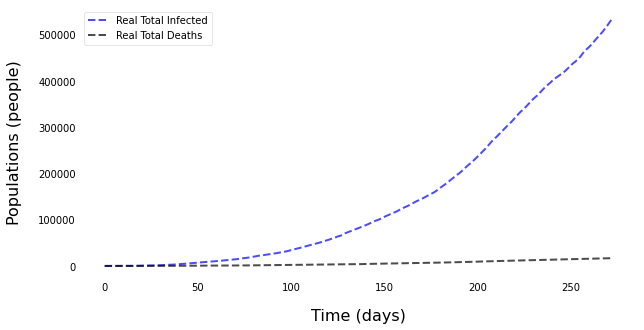

In [3]:
t = np.linspace(0, days-1, days)

f1, ax1 = plt.subplots(1,1,figsize=(10,5))

ax1.plot(t, real_Total_Infected, 'b--', alpha=0.7, linewidth=2, label='Real Total Infected')
ax1.plot(t, real_Total_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real Total Deaths')

ax1.set_xlabel('Time (days)', labelpad=16, size=16)
ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax1.spines[spine].set_visible(False)
plt.show();

**===========================================================================================================**

**作圖程式 - 基本模型**

In [4]:
def plot_SIHRD(t, S, I, H, R, D, show_all_compartments=False,only_show_real=False):
  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  if show_all_compartments==True:
    f, ax = plt.subplots(1,1,figsize=(10,5))
    
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')

    ax.set_xlabel('Time (days)', labelpad=16, size=16)
    ax.set_ylabel('Populations (people)', labelpad=16, size=16)

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

  f1, ax1 = plt.subplots(1,1,figsize=(10,5))

  ax1.plot(t, real_Total_Infected, 'b--', alpha=0.7, linewidth=2, label='Real Total Infected')
  ax1.plot(t, real_Total_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real Total Deaths')
  
  if not only_show_real:
    ax1.plot(t, predicted_Total_Infected, 'b', alpha=0.7, linewidth=2, label='Predicted Total Infected')  
    ax1.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Predicted Total Deaths')

  ax1.set_xlabel('Time (days)', labelpad=16, size=16)
  ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

  ax1.yaxis.set_tick_params(length=0)
  ax1.xaxis.set_tick_params(length=0)
  ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax1.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
  plt.show();


**模擬程式 - 基本模型**

In [5]:
def get_diff_SIHRD(populations, alpha, beta, r_I, r_H, eta):
    (S, I, H, R, D) = populations
    N = S + I + R

    dS = -alpha * S * I / N
    dI = alpha * S * I / N - beta * I - r_I *I
    dH = beta * I - r_H * H - eta * H
    dR = r_I *I + r_H * H
    dD = eta * H
    return (dS, dI, dH, dR, dD)

def mimic_SIHRD(days, initial, alpha, beta, r_I, r_H, eta):
  t = np.linspace(0, days-1, days)
  [S0, I0, H0, R0, D0] = initial

  S = [S0]
  I = [I0]
  H = [H0]
  R = [R0]
  D = [D0]
  for i in range(days-1):
    populations = [S[-1],I[-1],H[-1],R[-1],D[-1]]
    (dS, dI, dH, dR, dD) = get_diff_SIHRD(populations, alpha, beta, r_I, r_H, eta)
    S.append(S[-1]+dS)
    I.append(I[-1]+dI)
    H.append(H[-1]+dH)
    R.append(R[-1]+dR)
    D.append(D[-1]+dD)

  return (t, S, I, H, R, D)

**參數最佳化 - 基本模型**

In [6]:
def error_function_SIHRD(parameters):
  alpha = parameters[0]
  beta = parameters[1]
  r_I = parameters[2]
  r_H = parameters[3]
  eta = parameters[4]

  (S0, I0, H0, R0, D0) = (N-200, 200, 0, 0, 0)
  (t, S, I, H, R, D) = mimic_SIHRD(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta)

  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  error = 0
  for i in range(days):
    error += (real_Total_Infected[i]-predicted_Total_Infected[i])**2
    error += (real_Total_Deaths[i]-D[i])**2
  for i in parameters:
    error += int(i<0.02)*10000000000000000
  return error

Result = minimize(error_function_SIHRD, [0.5, 0.5, 0.5, 0.5, 0.5], method = 'Nelder-Mead', options={'maxiter':1e10})
print(Result)

 final_simplex: (array([[1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772 ],
       [1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772 ],
       [1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772 ],
       [1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772 ],
       [1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772 ],
       [1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772 ]]), array([5.18097954e+10, 5.18097954e+10, 5.18097954e+10, 5.18097954e+10,
       5.18097954e+10, 5.18097954e+10]))
           fun: 51809795387.523964
       message: 'Optimization terminated successfully.'
          nfev: 1595
           nit: 873
        status: 0
       success: True
             x: array([1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772 ])


**參數設定與模擬作圖 - 基本模型**

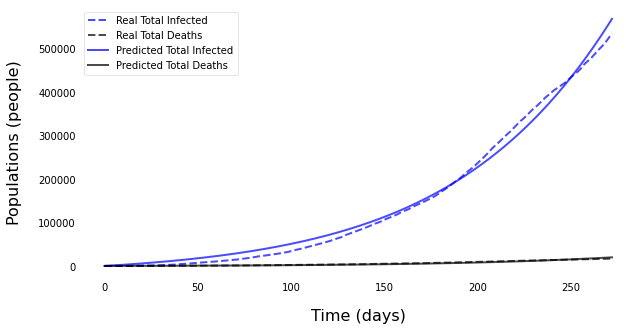

In [7]:
[alpha,beta,r_I,r_H,eta] = [1.28470302, 0.04636649, 1.22555222, 0.02907692, 0.8985772]

(S0, I0, H0, R0, D0) = (N-200, 200, 0, 0, 0)  #初始條件
(t, S, I, H, R, D) = mimic_SIHRD(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta)
plot_SIHRD(t, S, I, H, R, D)

**===========================================================================================================**

**作圖程式 - 口罩模型**

In [8]:
def plot_mask(t, SU, IU, SM, IM, H, R, D, show_all_compartments=False):
  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])


  if show_all_compartments==True:
    f, ax = plt.subplots(1,1,figsize=(10,5))
    
    ax.plot(t, SU, 'b', alpha=0.7, linewidth=2, label='Susceptible_Uncovered')
    ax.plot(t, IU, 'r', alpha=0.7, linewidth=2, label='Infected_Uncovered')
    ax.plot(t, SM, 'm', alpha=0.7, linewidth=2, label='Susceptible_Masked')
    ax.plot(t, IM, 'chocolate', alpha=0.7, linewidth=2, label='Infected_Masked')
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')

    ax.set_xlabel('Time (days)', labelpad=16, size=16)
    ax.set_ylabel('Populations (people)', labelpad=16, size=16)

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

  f1, ax1 = plt.subplots(1,1,figsize=(10,5))

  ax1.plot(t, real_Total_Infected, 'b--', alpha=0.7, linewidth=2, label='Real Total Infected')
  ax1.plot(t, predicted_Total_Infected, 'b', alpha=0.7, linewidth=2, label='Predicted Total Infected')
  ax1.plot(t, real_Total_Deaths, 'k--', alpha=0.7, linewidth=2, label='Real Total Deaths')
  ax1.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Predicted Total Deaths')

  ax1.set_xlabel('Time (days)', labelpad=16, size=16)
  ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

  ax1.yaxis.set_tick_params(length=0)
  ax1.xaxis.set_tick_params(length=0)
  ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax1.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
  plt.show();


**模擬程式 - 口罩模型**

In [9]:
def get_diff_mask(populations, alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i):
    (SU, IU, SM, IM, H, R, D) = populations

    dSU = -(alpha / N) * SU * (IU + (1-epsilon_o)*IM)
    dIU = (alpha / N) * SU * (IU + (1-epsilon_o)*IM) - beta * IU - r_I * IU
    dSM = -(alpha / N) * SM * (IU + (1-epsilon_o)*IM) * (1-epsilon_i)
    dIM = (alpha / N) * SM * (IU + (1-epsilon_o)*IM) * (1-epsilon_i) - beta * IM - r_I * IM
    dH = beta * (IU+IM) - r_H * H - eta * H
    dR = r_I *(IU+IM) + r_H * H
    dD = eta * H
    return (dSU, dIU, dSM, dIM, dH, dR, dD)

def mimic_mask(days, initial, alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i, change):
  t = np.linspace(0, days-1, days)
  [SU0, IU0, SM0, IM0, H0, R0, D0] = initial

  SU = [SU0]
  IU = [IU0]
  SM = [SM0]
  IM = [IM0]
  H = [H0]
  R = [R0]
  D = [D0]
  for i in range(days-1):
    if i==190:
      (SU[-1],SM[-1]) = (SU[-1]*(1-change),SM[-1]+SU[-1]*change)
      (IU[-1],IM[-1]) = (IU[-1]*(1-change),IM[-1]+IU[-1]*change)
    populations = [SU[-1],IU[-1],SM[-1],IM[-1],H[-1],R[-1],D[-1]]
    (dSU, dIU, dSM, dIM, dH, dR, dD) = get_diff_mask(populations, alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i)
    
    SU.append(SU[-1]+dSU)
    IU.append(IU[-1]+dIU)
    SM.append(SM[-1]+dSM)
    IM.append(IM[-1]+dIM)
    H.append(H[-1]+dH)
    R.append(R[-1]+dR)
    D.append(D[-1]+dD)

  return (t, SU, IU, SM, IM, H, R, D) 

**參數最佳化 - 口罩模型**

In [10]:
def error_function_mask(parameters): # mimic the second half
  epsilon_o = 0.5
  epsilon_i = 0.7  
  [alpha, beta, r_I, r_H, eta] = parameters[0:5]
  r = parameters[5]
  change = parameters[6]

  (SU0, IU0, SM0, IM0, H0, R0, D0) = (N-200)*(1-r), 200*(1-r), (N-200)*r, 200*r, 0, 0, 0 
  (t, SU, IU, SM, IM, H, R, D) = mimic_mask(days, [SU0, IU0, SM0, IM0, H0, R0, D0], alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i, change)

  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  error = 0
  for i in range(days):
    error += (real_Total_Infected[i]-predicted_Total_Infected[i])**2
    error += (real_Total_Deaths[i]-D[i])**2
  return error

Result = minimize(error_function_mask, [1.83498041, 0.13142441, 0.56142568, 0.48051873, 0.101715, 0.72, 0.5], method = 'Nelder-Mead', options={'maxiter':1e10})
print(Result)

 final_simplex: (array([[2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712],
       [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712],
       [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712],
       [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712],
       [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712],
       [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712],
       [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712],
       [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434,
        0.75623923, 0.02809712]]), array([4.10536087e+09, 4.10536087e+09, 4.10536087e+09, 4.10536087e+09,
       4.10536087e+09, 4.10536087e+09, 4.10536087e+09, 4.10536087e+09]))
           fun: 4105360870.76

**參數設定與模擬作圖 - 口罩模型**

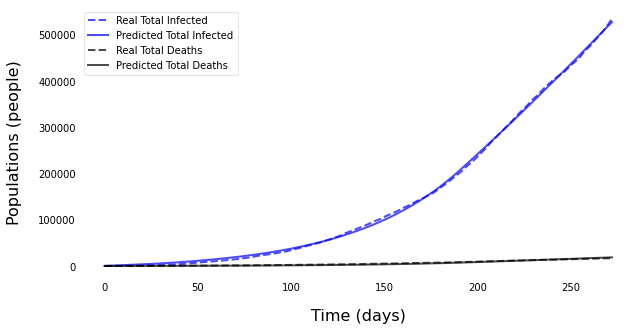

In [12]:
[alpha, beta, r_I, r_H, eta] = [2.45120054, 0.20815057, 0.64988577, 0.52441175, 0.09049434]
epsilon_o = 0.5
epsilon_i = 0.7
r = 0.75623923
change = 0.02809712

(SU0, IU0, SM0, IM0, H0, R0, D0) = (N-200)*(1-r), 200*(1-r), (N-200)*r, 200*r, 0, 0, 0
(t, SU, IU, SM, IM, H, R, D) = mimic_mask(days, [SU0, IU0, SM0, IM0, H0, R0, D0], alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i, change)
plot_mask(t, SU, IU, SM, IM, H, R, D) # after fix

**===========================================================================================================**

**模擬程式 - 基本模型改**

In [13]:
def mimic_SIHRD_new(day, initial, alpha, beta, r_I, r_H, eta, new_alpha): # alpha -> new_alpha at day 190
  t = np.linspace(0, day-1, day)
  [S0, I0, H0, R0, D0] = initial

  S = [S0]
  I = [I0]
  H = [H0]
  R = [R0]
  D = [D0]
  for i in range(day-1):
    if i==190:
      alpha = new_alpha
    populations = [S[-1],I[-1],H[-1],R[-1],D[-1]]
    (dS, dI, dH, dR, dD) = get_diff_SIHRD(populations, alpha, beta, r_I, r_H, eta)
    S.append(S[-1]+dS)
    I.append(I[-1]+dI)
    H.append(H[-1]+dH)
    R.append(R[-1]+dR)
    D.append(D[-1]+dD)

  return (t, S, I, H, R, D)

**參數最佳化 - 基本模型改**

In [14]:
def error_function_SIHRD_new(parameters):
  alpha = 0.7567532
  beta = 0.13244739
  r_I = 0.60730397
  r_H = 0.83140402
  eta = 0.2744264
  new_alpha = parameters[0]

  (S0, I0, H0, R0, D0) = (N-200, 200, 0, 0, 0) 
  (t, S, I, H, R, D) = mimic_SIHRD_new(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta, new_alpha)

  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  error = 0
  for i in range(days):
    error += (real_Total_Infected[i]-predicted_Total_Infected[i])**2
    error += (real_Total_Deaths[i]-D[i])**2
  return error

Result = minimize(error_function_SIHRD_new, [0.5], method = 'Nelder-Mead')
print(Result)

 final_simplex: (array([[0.7432141],
       [0.7432141]]), array([5.69912718e+09, 5.69912718e+09]))
           fun: 5699127184.15409
       message: 'Optimization terminated successfully.'
          nfev: 66
           nit: 33
        status: 0
       success: True
             x: array([0.7432141])


**參數設定與模擬作圖 - 基本模型改**

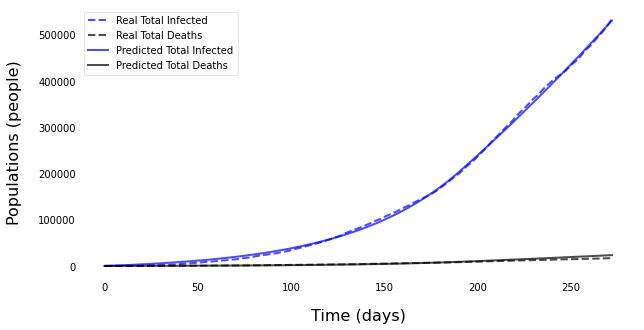

In [15]:
alpha = 0.7567532
beta = 0.13244739
r_I = 0.60730397
r_H = 0.83140402
eta = 0.2744264
new_alpha = 0.7432141

(S0, I0, H0, R0, D0) = (N-200, 200, 0, 0, 0) 
(t, S, I, H, R, D) = mimic_SIHRD_new(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta, new_alpha)
plot_SIHRD(t, S, I, H, R, D)


**===========================================================================================================**

**比較**

In [16]:
def plot_mask_2(t, SU, IU, SM, IM, H, R, D):
  predicted_Total_Infected = []
  for i in range(len(t)):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  f1, ax1 = plt.subplots(1,1,figsize=(10,5))

  ax1.plot(t, predicted_Total_Infected, 'b', alpha=0.7, linewidth=2, label='Predicted Total Infected')
  ax1.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Predicted Total Deaths')

  ax1.set_xlabel('Time (days)', labelpad=16, size=16)
  ax1.set_ylabel('Populations (people)', labelpad=16, size=16)

  ax1.yaxis.set_tick_params(length=0)
  ax1.xaxis.set_tick_params(length=0)
  ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax1.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
  plt.show();

def plot_SIHRD_2(t, S, I, H, R, D):
  predicted_Total_Infected = []
  for i in range(len(t)):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  f1, ax1 = plt.subplots(1,1,figsize=(10,5))
  
  ax1.plot(t, predicted_Total_Infected, 'b', alpha=0.7, linewidth=2, label='Predicted Total Infected')
  ax1.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Predicted Total Deaths')

  ax1.set_xlabel('Time (days)', labelpad=16, size=16)
  ax1.set_ylabel('Populations (people)', labelpad=20, size=16)

  ax1.yaxis.set_tick_params(length=0)
  ax1.xaxis.set_tick_params(length=0)
  ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax1.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
  plt.show();

def plot_compare(t, fundamental, mask, d=25):
  [S, I, H1, R1, D1] = fundamental
  [SU, IU, SM, IM, H2, R2, D2] = mask

  predicted_Total_Infected1 = []
  for i in range(len(t)):
    predicted_Total_Infected1.append(H1[i]+R1[i]+D1[i])

  predicted_Total_Infected2 = []
  for i in range(len(t)):
    predicted_Total_Infected2.append(H2[i]+R2[i]+D2[i])

  f1, ax1 = plt.subplots(1,1,figsize=(10,5))

  ax1.plot(t, predicted_Total_Infected1, 'b--', alpha=0.7, linewidth=2, label='Predicted Total Infected_fundamental model')
  ax1.plot(t, predicted_Total_Infected2, 'b', alpha=0.7, linewidth=2, label='Predicted Total Infected_mask model')
  ax1.plot(t, D1, 'k--', alpha=0.7, linewidth=2, label='Predicted Total Deaths_fundamental model')
  ax1.plot(t, D2, 'k', alpha=0.7, linewidth=2, label='Predicted Total Deaths_mask model')

  ax1.set_xlabel('Time (days)', labelpad=16, size=16)
  ax1.set_ylabel('Populations (people)', labelpad=d, size=16)
 

  ax1.yaxis.set_tick_params(length=0)
  ax1.xaxis.set_tick_params(length=0)
  ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax1.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
  plt.show();


In [17]:
mask_ratio = 0.01

alpha = 0.75461851
beta = 0.07182538
r_I = 0.66600446
r_H = 0.6481571
eta = 0.53229565
epsilon_o = 0.9
epsilon_i = 0.9

change = 0

(SU0, IU0, SM0, IM0, H0, R0, D0) = ((N-200)*(1-mask_ratio), 200*(1-mask_ratio), (N-200)*mask_ratio, 200*mask_ratio, 0, 0, 0)
(t, SU, IU, SM, IM, H, R, D) = mimic_mask(days, [SU0, IU0, SM0, IM0, H0, R0, D0], alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i, change)

Total_Infected = []
for i in range(days):
  Total_Infected.append(H[i]+R[i]+D[i])

Total_Deaths = D

def error_function_SIHRD_new(parameters):
  alpha = parameters[0]

  (S0, I0, H0, R0, D0) = (N-200, 200, 0, 0, 0) 
  (t, S, I, H, R, D) = mimic_SIHRD_new(days, [S0, I0, H0, R0, D0], alpha, beta, r_I, r_H, eta, alpha)

  predicted_Total_Infected = []
  for i in range(days):
    predicted_Total_Infected.append(H[i]+R[i]+D[i])

  error = 0
  for i in range(days):
    error += (Total_Infected[i]-predicted_Total_Infected[i])**2
    error += (Total_Deaths[i]-D[i])**2
  return error

Result = minimize(error_function_SIHRD_new, [0.5], method = 'Nelder-Mead')
print(Result)

 final_simplex: (array([[0.74709274],
       [0.74709274]]), array([3286579.96097256, 3286579.96097422]))
           fun: 3286579.96097256
       message: 'Optimization terminated successfully.'
          nfev: 72
           nit: 36
        status: 0
       success: True
             x: array([0.74709274])


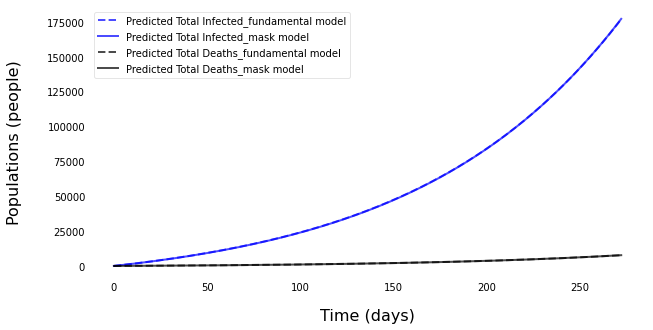

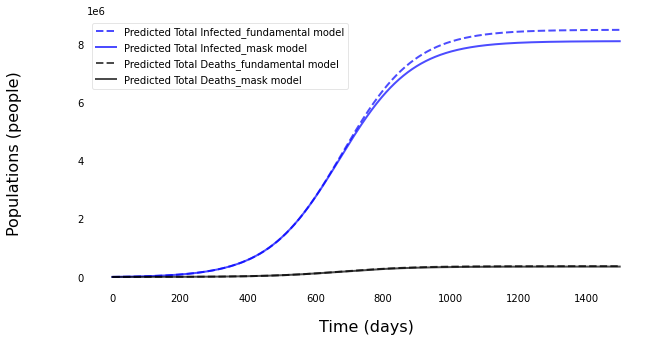

In [18]:
day = 1500 # longer

mask_ratio = 0.01

alpha = 0.75461851
beta = 0.07182538
r_I = 0.66600446
r_H = 0.6481571
eta = 0.53229565
epsilon_o = 0.9
epsilon_i = 0.9
change = 0

new_alpha = 0.74709274



(S0, I0, H0, R0, D0) = (N-200, 200, 0, 0, 0)  
(t, S, I, H1, R1, D1) = mimic_SIHRD_new(days, [S0, I0, H0, R0, D0], new_alpha, beta, r_I, r_H, eta, new_alpha)

(SU0, IU0, SM0, IM0, H0, R0, D0) = ((N-200)*(1-mask_ratio), 200*(1-mask_ratio), (N-200)*mask_ratio, 200*mask_ratio, 0, 0, 0)  
(t, SU, IU, SM, IM, H2, R2, D2) = mimic_mask(days, [SU0, IU0, SM0, IM0, H0, R0, D0], alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i, change)

plot_compare(t,(S, I, H1, R1, D1),(SU, IU, SM, IM, H2, R2, D2))


#------------

(S0, I0, H0, R0, D0) = (N-200, 200, 0, 0, 0)  
(t, S, I, H1, R1, D1) = mimic_SIHRD_new(day, [S0, I0, H0, R0, D0], new_alpha, beta, r_I, r_H, eta, new_alpha)

(SU0, IU0, SM0, IM0, H0, R0, D0) = ((N-200)*(1-mask_ratio), 200*(1-mask_ratio), (N-200)*mask_ratio, 200*mask_ratio, 0, 0, 0) 
(t, SU, IU, SM, IM, H2, R2, D2) = mimic_mask(day, [SU0, IU0, SM0, IM0, H0, R0, D0], alpha, beta, r_I, r_H, eta, epsilon_o, epsilon_i, change)

plot_compare(t,(S, I, H1, R1, D1),(SU, IU, SM, IM, H2, R2, D2),d=55)